## Gerekli Kütüphaneler

In [90]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns

In [91]:
df = pd.read_csv("dataset/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [93]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [94]:
df.describe()
# burada px_height min 0 olarak görüldüğünden problemli veri var demek olur. onu düzeltmeliyiz
# kolonların ne ifade ettiğini ve ne değerler alabileceğini bilmemiz lazım çünkü ona göre doğru veri setini hazırlamış oluruz.
# öbür türlü hatalı veriler ile modelimiz iyi bir performans göstermez
# örneğin ekran yüksekliği veya genişliği 0 olamaz, batarya 0 olamaz, fc gibi bazı kolonlar negatif olamaz gibi

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


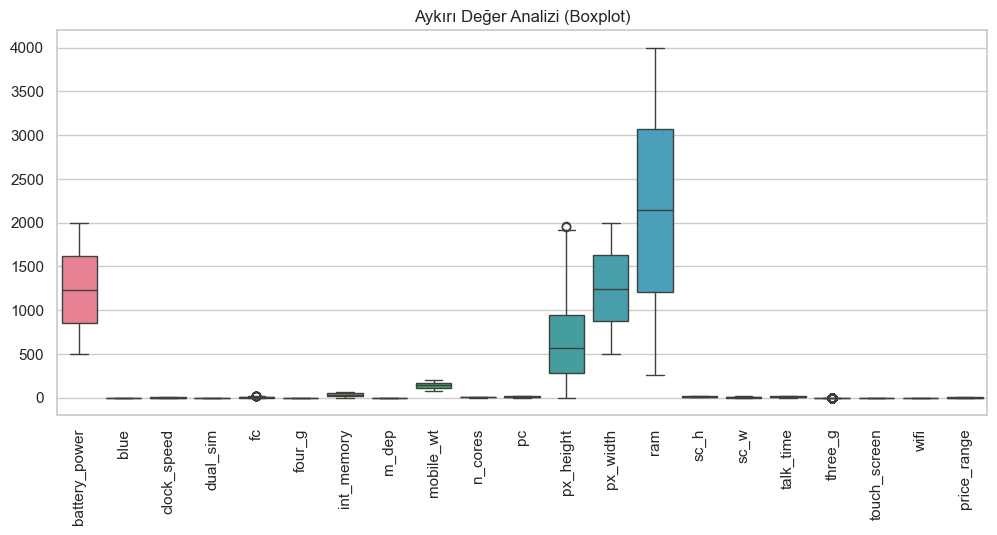

In [95]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.title("Aykırı Değer Analizi (Boxplot)")
plt.xticks(rotation=90)
plt.show()

In [96]:
print("\nSıfır px_height sayısı:", (df["px_height"] == 0).sum())
print("Sıfır px_width sayısı:", (df["px_width"] == 0).sum())


Sıfır px_height sayısı: 2
Sıfır px_width sayısı: 0


In [97]:
# px_height ve sc_w sütunlarında fiziksel olarak mümkün olmayan 0 değerleri tespit edilmiştir. 
# Bu değerler ölçüm hatası olarak değerlendirilmiş ve veri bütünlüğünü artırmak amacıyla ilgili satırlar veri setinden kaldırılmıştır.
df = df[df["px_height"] != 0]
df = df[df["sc_w"] != 0]


Temizlik sonrasında Feature Engineering aşamasında telefon ekranı ve donanım özelliklerini daha iyi yansıtan 
total_pixels, screen_area ve ppi gibi yeni özellikler aşağıda türetilmiştir. 
Bu işlem modelin fiyat tahmini performansını artırmak için yapılmıştır.

In [98]:
# Feature Engineering
df["total_pixels"] = df["px_height"] * df["px_width"]
df["screen_area"] = df["sc_h"] * df["sc_w"]

In [99]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

In [100]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop("price_range", axis=1)
y = df["price_range"]

selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)

f_test_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print("ANOVA F-test Skorları:")
print(f_test_scores)

ANOVA F-test Skorları:
ram              3202.974360
battery_power      26.230329
total_pixels       23.500737
px_height          18.266511
px_width           18.169823
mobile_wt           3.161009
int_memory          2.823901
n_cores             2.517046
screen_area         1.808792
sc_h                1.675369
sc_w                1.265842
talk_time           1.260325
m_dep               1.222916
four_g              1.100872
touch_screen        1.050856
blue                0.857296
dual_sim            0.682258
wifi                0.668941
clock_speed         0.627811
fc                  0.427118
pc                  0.342985
three_g             0.291570
dtype: float64


ANOVA F-test analizi, her bir özelliğin price_range sınıflarını ayırt etme gücünü ölçmek için uygulanmıştır. Sonuçlara göre en yüksek F-skorunu RAM almış ve fiyat aralığını belirlemede açık ara en etkili özellik olduğu görülmüştür. RAM’i battery_power, ppi, total_pixels, px_width ve px_height gibi ekran çözünürlüğü ve batarya kapasitesiyle ilgili değişkenler takip etmektedir. Bu özellikler fiyat üzerinde orta-yüksek düzeyde etkili bulunmuştur.
Buna karşılık dual_sim, three_g, wifi, blue, four_g, touch_screen, pc ve fc gibi ikili veya düşük varyanslı değişkenlerin F-skorları düşük çıkmış ve fiyatı ayırt etmede anlamlı bir katkı sağlamadıkları görülmüştür. Genel olarak ANOVA F-test, modelleme aşamasında öncelikli olarak RAM ve ekran/batarya özelliklerinin dikkate alınması gerektiğini göstermiştir.

In [103]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop("price_range", axis=1)
y = df["price_range"]

mi = mutual_info_classif(X, y)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Mutual Information Skorları:")
print(mi_scores)

Mutual Information Skorları:
ram              0.844285
screen_area      0.047843
px_width         0.034880
fc               0.029939
battery_power    0.029851
mobile_wt        0.024824
sc_w             0.018535
total_pixels     0.018156
touch_screen     0.014248
px_height        0.012502
talk_time        0.010426
clock_speed      0.007102
n_cores          0.002749
dual_sim         0.001378
four_g           0.000000
blue             0.000000
m_dep            0.000000
int_memory       0.000000
pc               0.000000
sc_h             0.000000
three_g          0.000000
wifi             0.000000
dtype: float64


Mutual Information analizi, hedef değişken (price_range) ile en güçlü ilişkiye sahip değişkenin RAM olduğunu göstermektedir (MI skoru 0.85). Bu skor, RAM’in fiyat tahmininde en belirleyici özellik olduğunu göstermektedir.

RAM’den sonra sc_w, screen_area, battery_power ve ppi değişkenleri görece yüksek MI skorlarına sahiptir. Bu değişkenler cihazın ekran büyüklüğü, batarya kapasitesi ve ekran çözünürlüğü gibi fiyatı doğrudan etkileyen özellikleri temsil eder.

Hem Mutual Information hem de ANOVA F-test sonuçları tutarlı şekilde RAM, çözünürlük (px_width, px_height, ppi, total_pixels) ve battery_power özelliklerinin telefon fiyat aralığı üzerinde en yüksek etkiye sahip özellikler olduğunu göstermektedir. Buna karşılık kategorik ikili özellikler (dual_sim, three_g, wifi, blue) fiyatı anlamlı şekilde ayırt edememektedir.

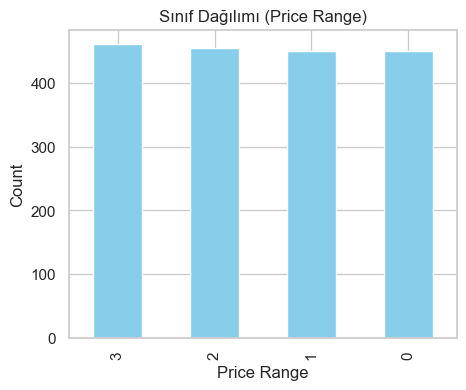

Sınıf dağılımı:
price_range
3    461
2    456
1    451
0    451
Name: count, dtype: int64


In [104]:
plt.figure(figsize=(5,4))
df["price_range"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Sınıf Dağılımı (Price Range)")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

print("Sınıf dağılımı:")
print(df["price_range"].value_counts())
# Fiyat aralıklarının (price_range) dağılımı incelendiğinde tüm sınıfların (0, 1, 2, 3) neredeyse eşit sayıda örneğe sahip olduğu görülmüştür. 
# Bu nedenle veri seti dengelidir ve SMOTE gibi bir dengeleme yöntemine ihtiyaç yoktur.

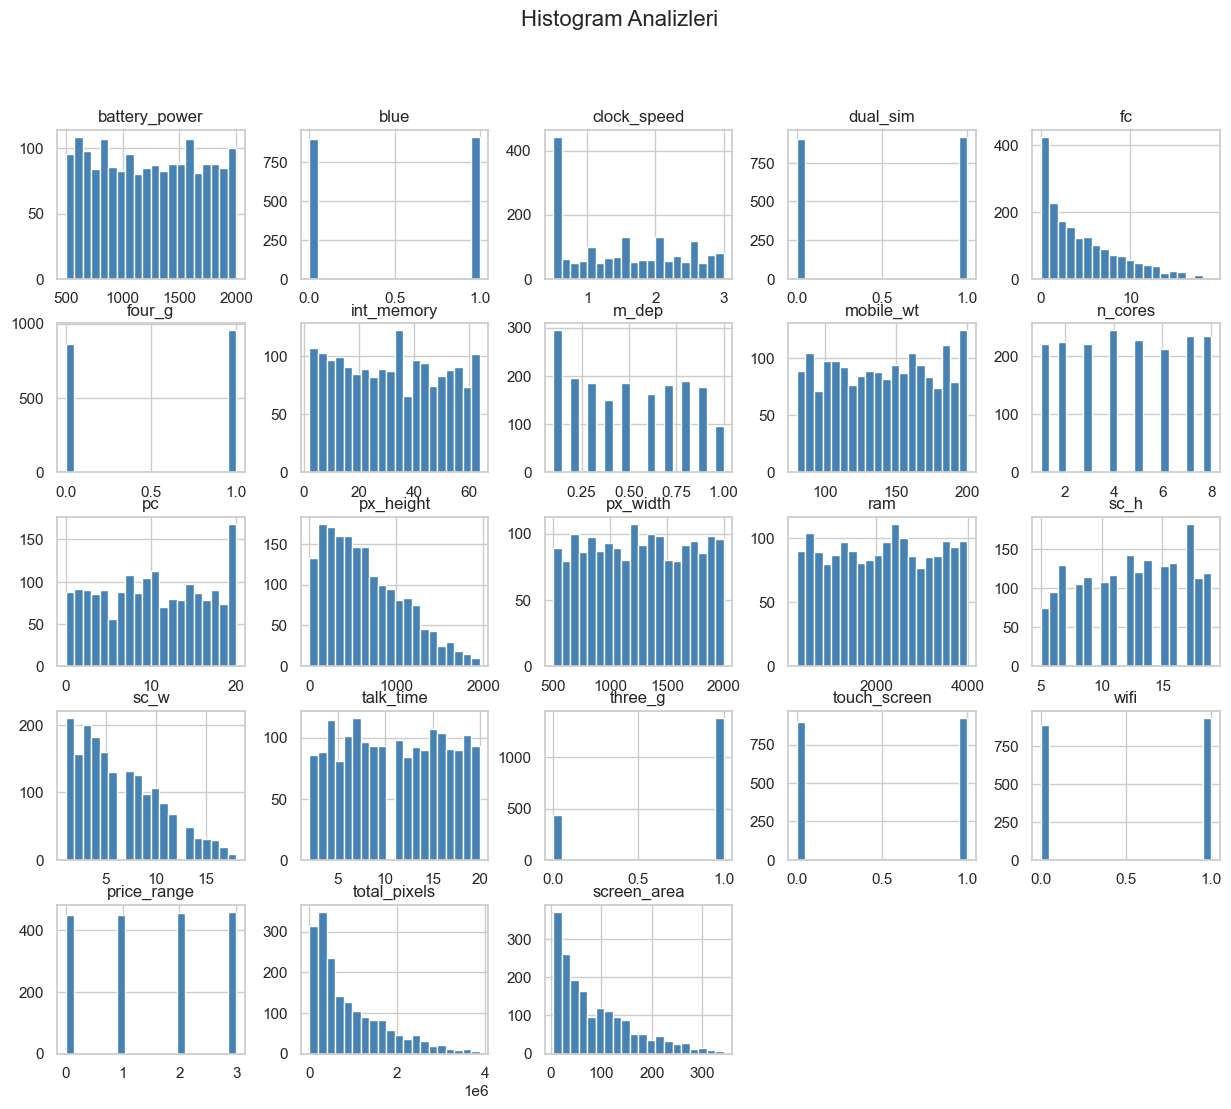

In [105]:
# Histogram grafikleri incelendiğinde battery_power ve ram değişkenlerinin geniş aralıklarda dağıldığı, 
# bazı değişkenlerin ise (blue, three_g, touch_screen gibi) kategorik yapıda olduğu görülmüştür.
df.hist(figsize=(15,12), bins=20, color='steelblue')
plt.suptitle("Histogram Analizleri", fontsize=16)
plt.show()

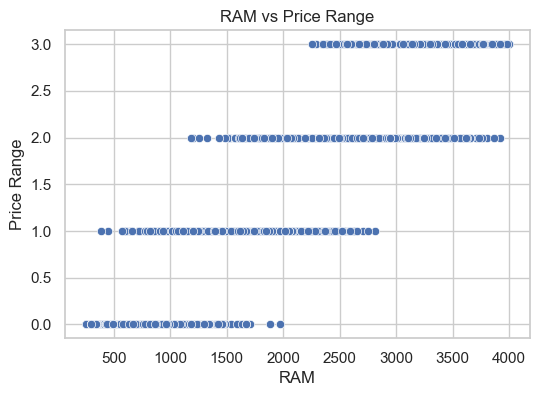

In [106]:
# Scatter plot, RAM’in fiyat aralığı üzerinde güçlü bir etkisi olduğunu göstermektedir. 
# RAM arttıkça price_range sınıflarının üst segmentlere doğru kaydığı gözlemlenmiştir.
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["ram"], y=df["price_range"])
plt.title("RAM vs Price Range")
plt.xlabel("RAM")
plt.ylabel("Price Range")
plt.show()

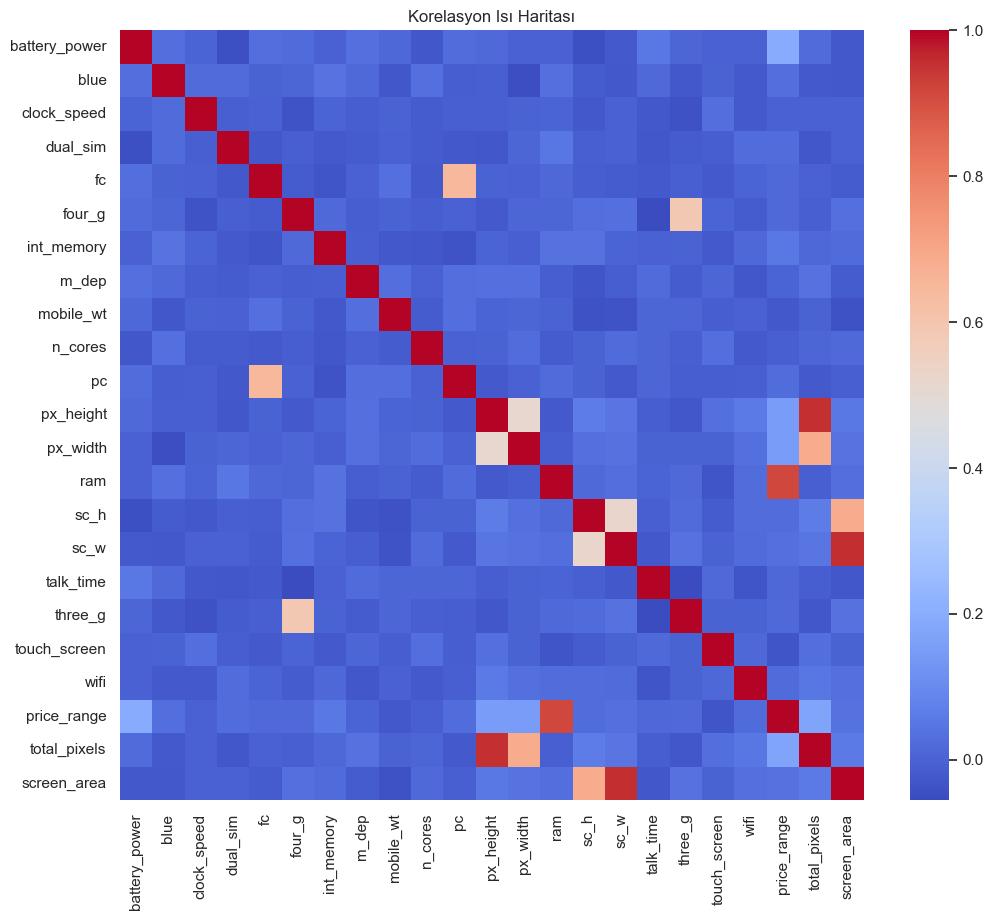

In [107]:
# Korelasyon haritası, px_height–px_width ve sc_h–sc_w gibi özelliklerin birbirleriyle yüksek düzeyde ilişkili olduğunu göstermiştir.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Korelasyon Isı Haritası")
plt.show()